# Initial Analysis

The corresponding dataset consists of 253,680 survey responses to the [CDC's BRFSS2015](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_binary_health_indicators_BRFSS2015.csv). Every observation is described by 22 feature columns and 1 class column which identifies it to be either a nondiabetic or prediabetic/diabetic. The features of data is described as follows:

*   **Diabetes_binary**= Object Class (nondiabetic, prediabetes or diabetes)
*   **HighBP** = Subject's blood pressure classification (no high, high)
*   **HighChol** = Subject's cholesterol classification (no high, high)
*   **CholCheck** = Cholesterol Check in past 5 years (no check, check)
*   **BMI** = Body Mass Index
*   **Smoker** = Whether subject has smoked 100 cigarettes in their life (no, yes)
*   **Stroke** = Ever had stroke (no, yes)
*   **HeartDieseaseorAttack** = Subject has had heart disease or attack (no, yes)
*   **PhysActivity** = Physical activity in past 30 days (no, yes)
*   **Fruits** = Consume fruits 1 or more times per day (no, yes)
*   **Veggies** = Consume vegetables 1 or more times per day (no, yes)
*  **HvyAlcoholConsump** = Adult men >=14 drinks per week, adult women >= 7 drinks per week (no, yes)

*   **AnyHealthcare** = Have any healthcare coverage (no, yes)
*   **NoDocbcCost** = Time in past 12 months where subject needed to see doctor but could not because of cost (no,yes)
*   **GenHlth** = self assessed general health quality (excellent, very good, good, fair, poor)
*   **MentHlth** = Days of poor mental health scale 1-30 days
* **PhysHlth** = Physical illness or injury in past 30 days (scale: 1-30)
* **DiffWalk** = Difficulty walking or climbing stairs (no, yes)
* **Sex** = Subject's sex (female, male)
* **Age** = 13-level age category
 *   1: 18 - 24
 *   2: 25 - 29
 *   3: 30 - 34
 *   4: 35 - 39
 *   5: 40 - 44
 *   6: 45 - 49
 *   7: 50 - 54
 *   8: 55 - 59
 *   9: 60 - 64
 *   10: 65 - 69
 *   11: 70 - 74
 *   12: 75 - 79
 *   13: 80+
* **Education** = Education level, scale 1-6
 *   1: Never attended school or only kindergarten
 *   2: Grades 1-8
 *   3: Grades 9-11
 *   4: Grade 12 or GED
 *   5: College 1 year to 3 years
 *   6: College 4+ years (Graduate)
* **Income** = Income Level, scale 1-8
 *   1: Less than \$10,000
 *   2: Less than \$15,000
 *   3: Less than \$20,000
 *   4: Less than \$25,000
 *   5: Less than \$35,000
 *   6: Less than \$50,000
 *   7: Less than \$75,000
 *   8: \$75,000 or more

## Data Analysis

- **Categorical / Binary Features:** HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex


- **Ordinal Features:** GenHlth, Education, Income, Age


- **Continuous Features:** BMI, MentHlth, PhysHlth


- **Target Column:** Diabetes_binary

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Summary

In [2]:
# File path for data set in local computer
# PLEASE UPDATE FILE PATH TO WHERE DATASET IS LOCATED ON LOCAL COMPUTER
file_path = "C:/Users/rajiv/Documents/Masters/Classes/ML/Midterm/Diabetes.csv"

# Read the file into data variable
data = pd.read_csv(file_path)

# Shows initial rows of dataset
print("Preview of dataset:")
print(data.head())

# Show info for data
print("\nData Info:")
print(data.info())

# Basic statistics of dataset
print("\nData Description:")
print(data.describe())

Preview of dataset:
   Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0              0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1              0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2              0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3              0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4              0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0    

In [3]:
# Number of samples in the minority class and majority class of the dataset
# Count samples in class

data['Diabetes_label'] = data['Diabetes_binary'].map({0: 'Non-Diabetic', 1: 'Diabetic or Prediabetic'})
class_samples = data['Diabetes_label'].value_counts()
print("\nNumber of samples:")
print(class_samples)
data = data.drop(columns=['Diabetes_label'])


Number of samples:
Non-Diabetic               218334
Diabetic or Prediabetic     35346
Name: Diabetes_label, dtype: int64


## Data Pre-Processing

In [4]:
# Check for missing values in dataset
print("Missing values per column:")
data.isnull().sum()

Missing values per column:


Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

As there are no missing values in the data, no missing values need to be handled

In [5]:
# Check for duplicate values in dataset
duplicates = data.duplicated()
if duplicates.any():
  print(f"Number of duplicate rows: {duplicates.sum()}")
else:
  print("No duplicate rows found.")

Number of duplicate rows: 24206


The likelihood of data from a CDC BRFSS survey being comprised of ~10% duplicates is highly unlikely. That being said this data is from a Kaggle dataset which was uploaded by a third party user. The data duplication most likely occurred when the user merged or cleaned the data. For this reason it would be best to drop these rows as they could contribute to redundant data and cause bias in our models.

In [6]:
data = data.drop_duplicates()

Categorical variables are already encoded.

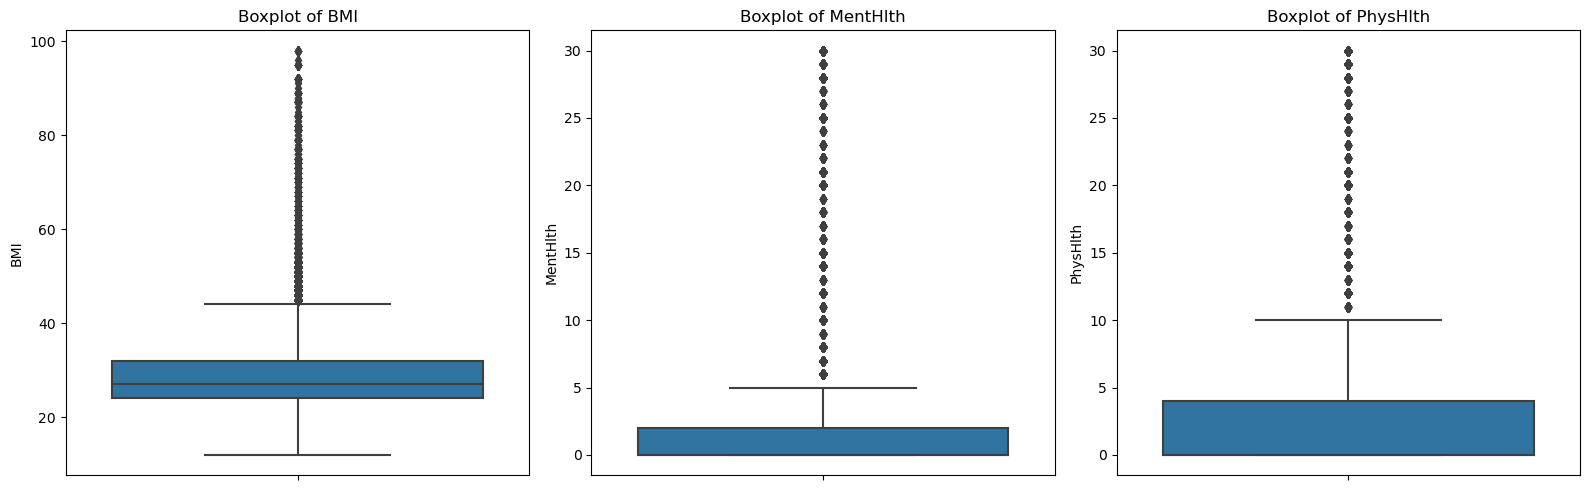

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pick numeric columns to plot as box plots
numeric_features = ["BMI", "MentHlth", "PhysHlth"]

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_features)
num_rows = (num_cols + 2) // 3

# Create box plots for each numeric column
plt.figure(figsize=(16, 5 * num_rows))  # Adjust figure height based on rows
for i, col in enumerate(numeric_features, 1):
    plt.subplot(num_rows, 3, i)  # Use calculated rows and 3 columns
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

In [8]:
from scipy import stats
import numpy as np

# Calculate Z-Scores for columns with numeric values
z_scores = stats.zscore(data[numeric_features])

# Identify outliers using z-score
outliers_z = (abs(z_scores) > 3).any(axis=1)

#Print which rows have outliers based on z-scores
outlier_rows_z = data.loc[outliers_z, numeric_features]
print("Outliers detected using z-score:")
print(outlier_rows_z)

Outliers detected using z-score:
         BMI  MentHlth  PhysHlth
2       28.0      30.0      30.0
8       30.0      30.0      30.0
14      33.0      30.0      28.0
20      22.0      30.0       0.0
45      21.0      30.0       0.0
...      ...       ...       ...
253630  27.0      30.0       5.0
253635  27.0      30.0      21.0
253640  30.0      30.0       0.0
253649  27.0      30.0       5.0
253665  17.0      30.0      30.0

[14905 rows x 3 columns]


In [9]:
import pandas as pd
import numpy as np
from scipy import stats

# Caclulate z-scores again
z_scores = np.abs(stats.zscore(data[numeric_features]))

# Calculate z-scores count for each numeric
count_outliers = (z_scores > 3).sum(axis=0)

# Organized to see outlier count per numeric feature
outlier_summary = pd.Series(count_outliers, index=numeric_features)

# Print the outliers for each feature
print("Number outliers per feature:")
print(outlier_summary)

import numpy as np

# Compute mean and std of BMI
mu = data['BMI'].mean()
sigma = data['BMI'].std()

# Compute the raw BMI value for z = 3
z3_upper = mu + 3 * sigma
z3_lower = mu - 3 * sigma

Number outliers per feature:
BMI          2547
MentHlth    12643
PhysHlth        0
dtype: int64


In [10]:
# Many BMI values are extremely and unrealistically high so it is safer
# to replace many of the BMI outliers above a certain threshold to the 99 percentile BMI
# so that the high BMI values are not underrepresented but still do not skew the data too drastically. 
upper_bmi = data['BMI'].quantile(0.99)
data['BMI'] = np.clip(data['BMI'], None, upper_bmi)
print(f"New BMI max after capping: {data['BMI'].max()}")

New BMI max after capping: 50.0


Despite the significant rate of outliers for MentHlth, its important to leave this statistic as is because 
altering it in anyway could mean affecting how much poor mental health is represented in our dataset.
Many mental health conditions are chronic as well which means patients who suffer 30 days of poor mental health 
over the past month likely suffer from a significant mental health condition.

Lets visualize the data again after we handled outliers.

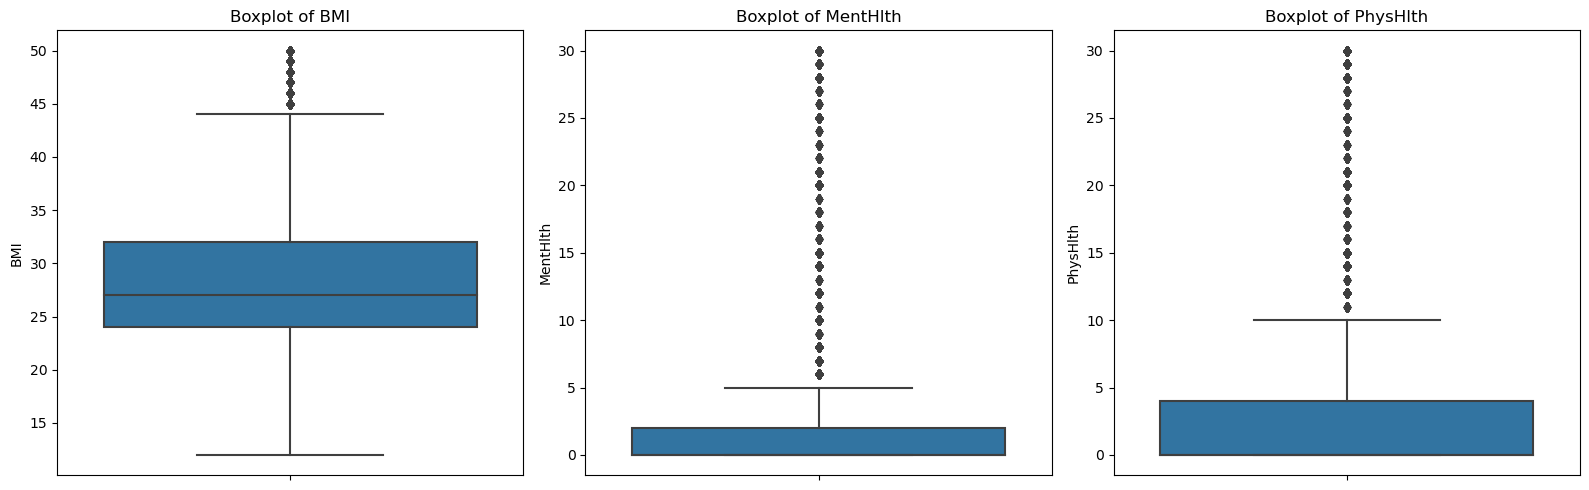

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pick numeric columns to plot as box plots
numeric_features = ["BMI", "MentHlth", "PhysHlth"]

# Calculate the number of rows and columns for subplots
num_cols = len(numeric_features)
num_rows = (num_cols + 2) // 3

# Create box plots for each numeric column
plt.figure(figsize=(16, 5 * num_rows))  # Adjust figure height based on rows
for i, col in enumerate(numeric_features, 1):
    plt.subplot(num_rows, 3, i)  # Use calculated rows and 3 columns
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

Our BMI boxplot has far less skew while still representing all of the data.

Upon observation of the data, it is easy to notice that none of the features need to be encoded as all categorical variables, either binary or ordinal, are already encoded within the dataset. For the purpose of this experiment, a combination of RobustScaler for BMI and a combination of yeo-johnson (as opposed to BoxCox because yeo-johnson can handle zeroes) and standard scaler would be best for MentlHlth and PhysHlth.

I use robust scaling for BMI such that its less sensitive to extreme values caused by outliers. Yeo-Johnson reduces skewness and then Standard Scaler normalizes the data around 0. This allows for each numeric feature to contribute comparably to the models they are applied to.

Skewness before:
BMI         0.989078
MentHlth    2.544532
PhysHlth    2.044139
dtype: float64

Skewness after:
BMI         0.989078
MentHlth    0.808475
PhysHlth    0.601160
dtype: float64


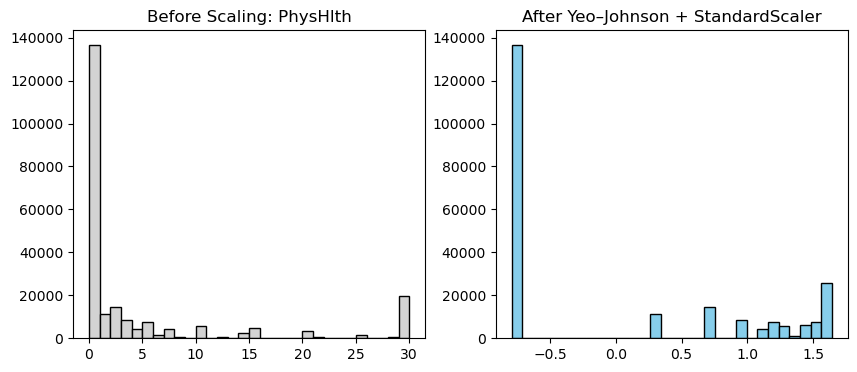

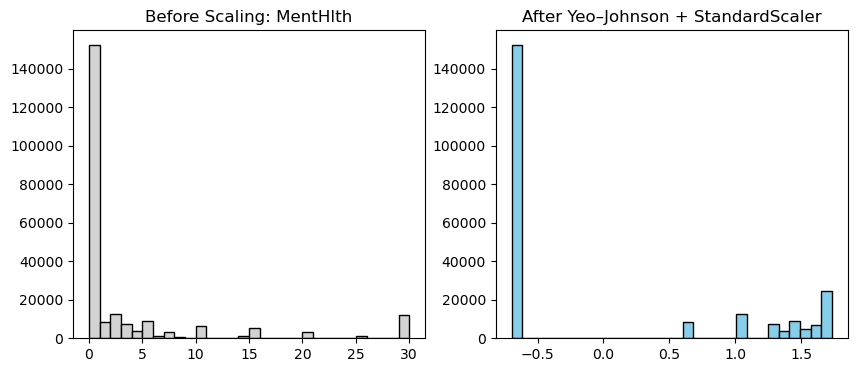

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, PowerTransformer, StandardScaler
import matplotlib.pyplot as plt


# Numeric Features
numeric_features = ['BMI', 'MentHlth', 'PhysHlth']

# Make a copy of the numeric/continuous features
data_numeric = data[numeric_features].copy()

# Use Robust Scaler for BMI
robust_scaler = RobustScaler()
data_numeric['BMI_scaled'] = robust_scaler.fit_transform(data_numeric[['BMI']])

# Yeo Johnson for other continuous features
pt  = PowerTransformer(method = 'yeo-johnson')
data_numeric[['MentHlth_yj', 'PhysHlth_yj']] = pt.fit_transform(data_numeric[['MentHlth', 'PhysHlth']])

# Apply Standard scaler on those other features
std_scaler =  StandardScaler()
data_numeric[['MentHlth_scaled', 'PhysHlth_scaled']] = std_scaler.fit_transform(data_numeric[['MentHlth_yj', 'PhysHlth_yj']])

# Replace original with scaled on the copied data
data_scaled = data.copy()
data_scaled['BMI'] = data_numeric['BMI_scaled']
data_scaled['MentHlth'] = data_numeric['MentHlth_scaled']
data_scaled['PhysHlth'] = data_numeric['PhysHlth_scaled']

data_scaled = data_scaled.drop(columns=['BMI_scaled', 'MentHlth_yj', 'PhysHlth_yj', 'PhysHlth_scaled', 'MentHlth_scaled'], errors='ignore')

print("Skewness before:")
print(data[numeric_features].skew())

print("\nSkewness after:")
print(data_scaled[numeric_features].skew())


fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(data['PhysHlth'], bins=30, color='lightgray', edgecolor='black')
axes[0].set_title("Before Scaling: PhysHlth")
axes[1].hist(data_scaled['PhysHlth'], bins=30, color='skyblue', edgecolor='black')
axes[1].set_title("After Yeo–Johnson + StandardScaler")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(data['MentHlth'], bins=30, color='lightgray', edgecolor='black')
axes[0].set_title("Before Scaling: MentHlth")
axes[1].hist(data_scaled['MentHlth'], bins=30, color='skyblue', edgecolor='black')
axes[1].set_title("After Yeo–Johnson + StandardScaler")
plt.show()


The original distributions for both MentHlth and PhysHlth were both highly right skewed with the majority for both distributions concentrating around 0 or 1 with a tail that extended to the max value of 30 for this ordinal feature. After applying Yeo-Johnson followed by Standard Scaler we see less skew as values are more compacted around a mean of 0. In the long run this helps us create a model where features evenly contribute to feature training and the impact of outliers is diminished. 

We must balance the dataset to train the data but this will be done right before the testing phase. For now we will move on to Exploratory Data Analysis.

## Exploratory Data Analysis

### Distributions of Features

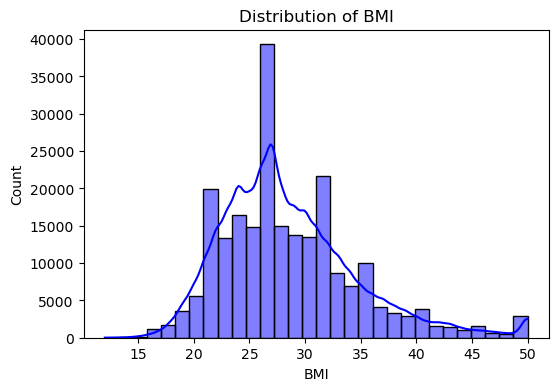

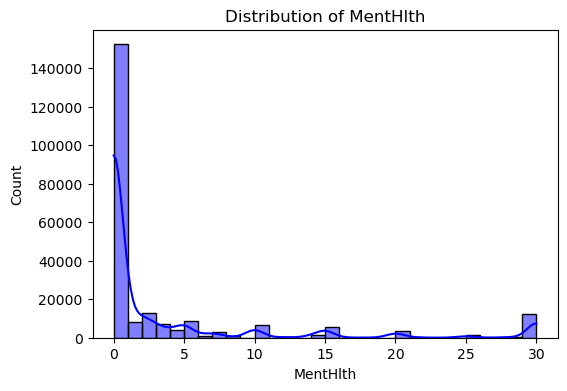

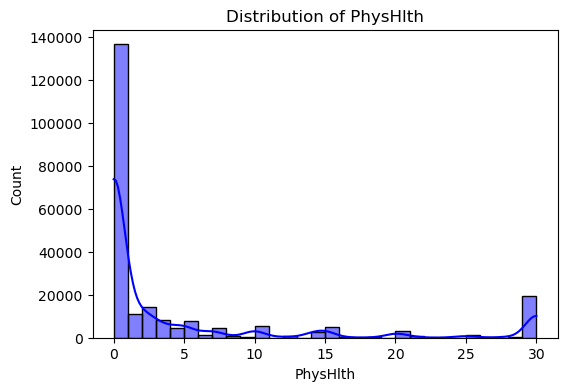

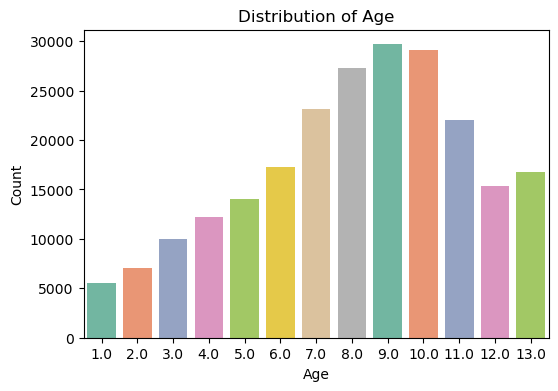

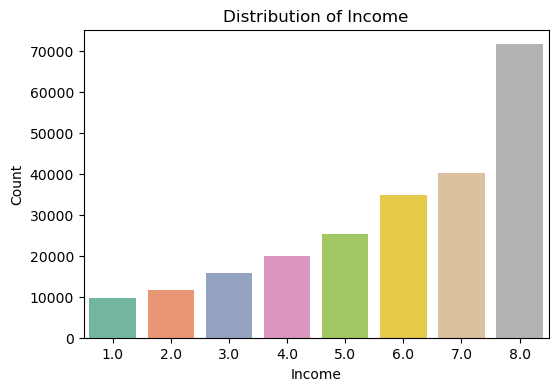

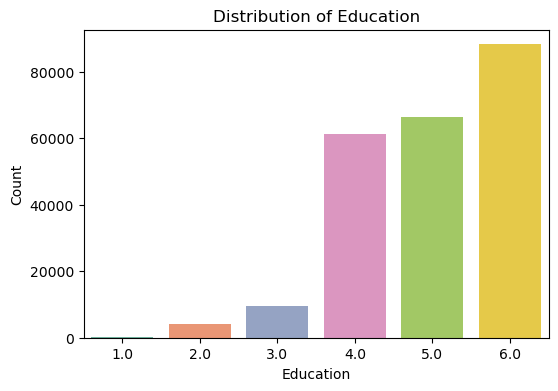

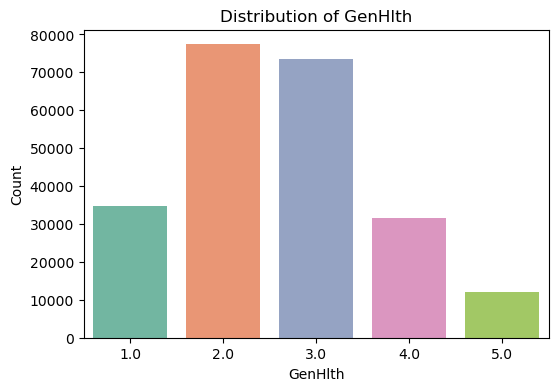

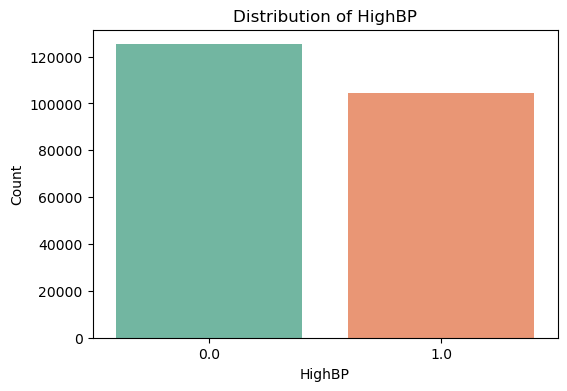

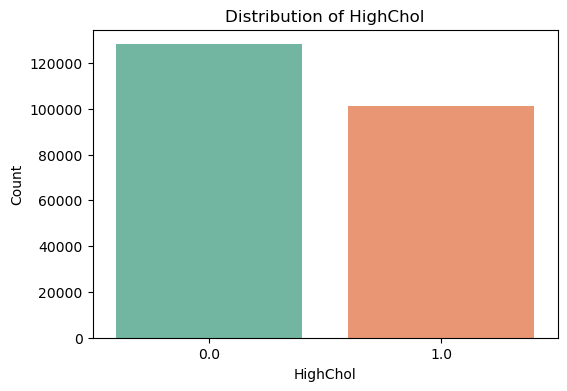

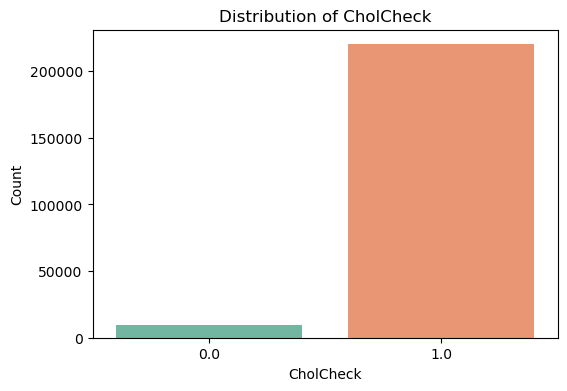

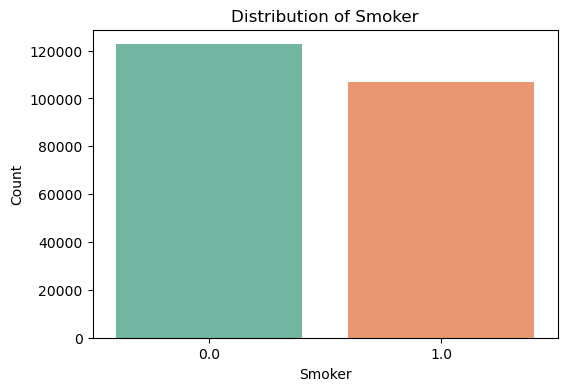

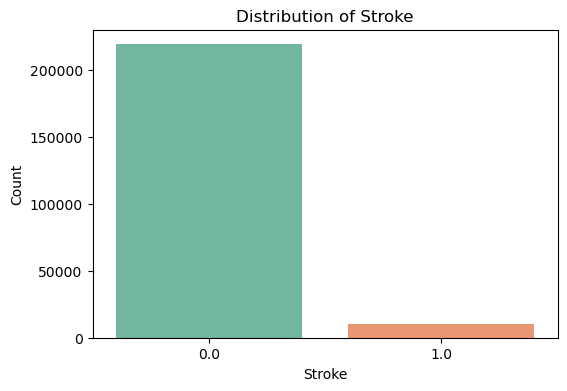

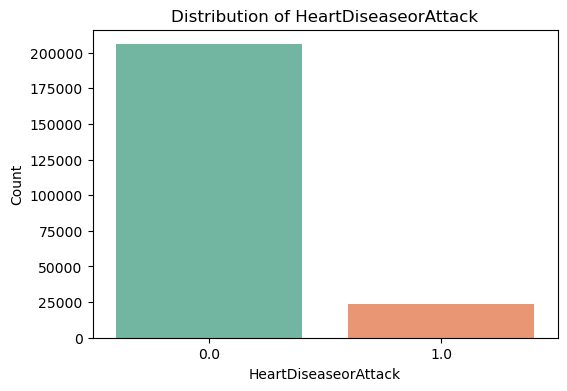

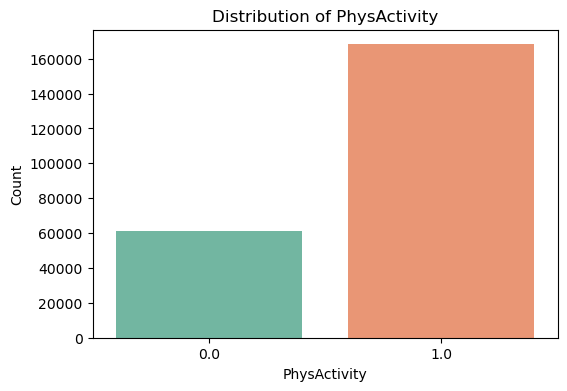

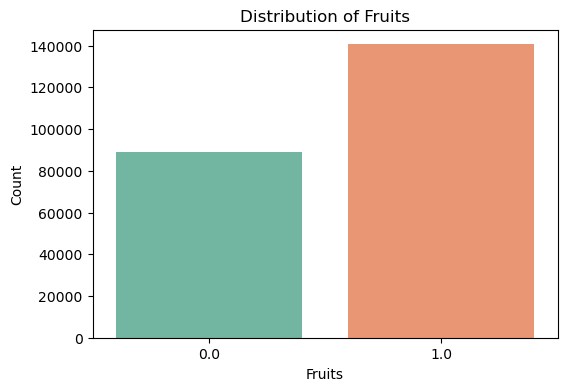

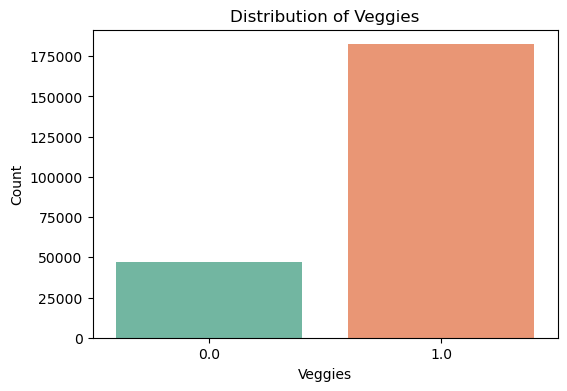

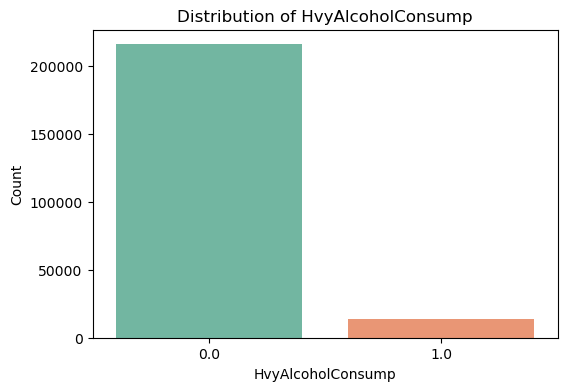

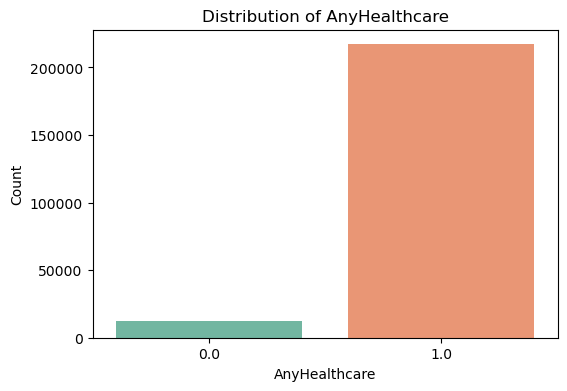

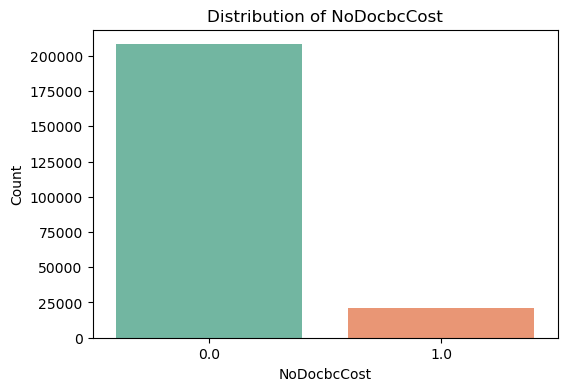

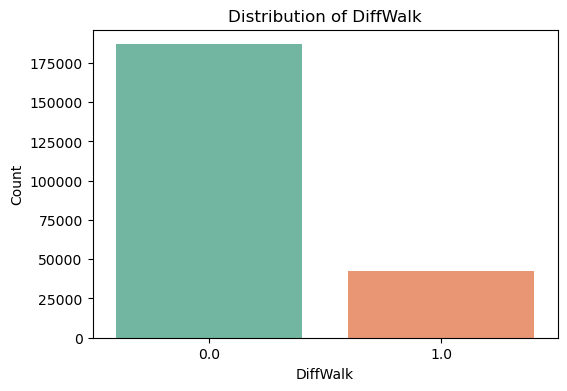

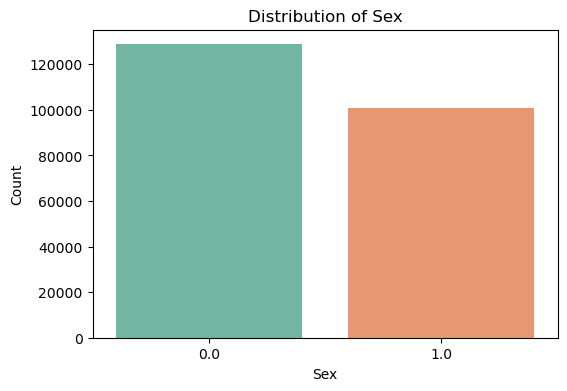

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explicitly define numeric and categorical features
numeric_features = ['BMI', 'MentHlth', 'PhysHlth']
categorical_features = ['Age','Income','Education','GenHlth','HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
                        'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()
    
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=data[col], palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


For the numeric features of the dataset I plotted histograms to visualize each distribution. For the remaining categorical features I used a count plot to show the number of records that comprised each category for each categorical variable.

For BMI we see a mostly normal distribution with most of the values fall around 25-30 which would be the normal BMI range for most adult individuals. The plot has a right skew indicating some higher value of the dataset include high BMI values at and above the 50 range.

MentHlth has a distribution with a very strong right skew as an overwhelming majority of participants report having 0-1 days of poor mental health over the past month. The skew is caused by many of the participants who do suffer from mental health problems reporting 30 days of poor mental health.

The plot for poor PhysHealth follows a very similar distribution as the plot for MentHlth.

The plot for age shows that a majority of the participants fall under the 7-10 age range which would indicate ages from  50 - 70.

The plot for income shows that a majority of the data set makes \$75,000 or more per year with the remaining participants all earning less.

The plot for education indicates that a majority of participants have at least completed highschool with very few having completed less schooling than that. 

The plot for GenHealth has a majority of participants indicating that they have Very Good or Good health.

The plot of HighBP indicates that the amount of participants without HighBP is only slightly greater than that with high BP (About 20k).

The plot for HighChol follows the same pattern as HighBP.

The plot for CholCheck indicates that an overwhleming majority of particpants have had their cholesterol checked in the past 5 years.

The plot for Smoker follows a similar pattern as HighChol and HighBP.

The plot for Stroke indicates that an overhwhelming majority of participants have not had a stroke.

The plot for HeartDiseaseorAttack indicates that an overwhelming majority of participants have not had HeartDiseaseorAttack.

The plot for PhysActivity indicates that a majority of participants have engaged in physical activity over the past 30 days. 

The plot for fruits indicates that that a majority of participants have eaten fruits 1 or more times per day over the last 30 days

The plot for veggies indicates that that a majority of participants have eaten veggies 1 or more times per day over the last 30 days

The plot for HvyAlcoholConsumption indicates that an overwhelming majority of participants do not heavily consume alcohol.

The plot for AnyHealthcare shows that an overwhelming majority of participants do have some form of healthcare.

The plot for NoDocbcCost shows that a majority of participants did not avoid seeing the doctor over the past 12 months because of cost. 

The plot for DiffWalk shows that a majority of participants do not have a problem walking or climbing stairs.

The plot for Age shows that is a higher female population in the dataset than male.

### Correlation Matrix

<AxesSubplot:>

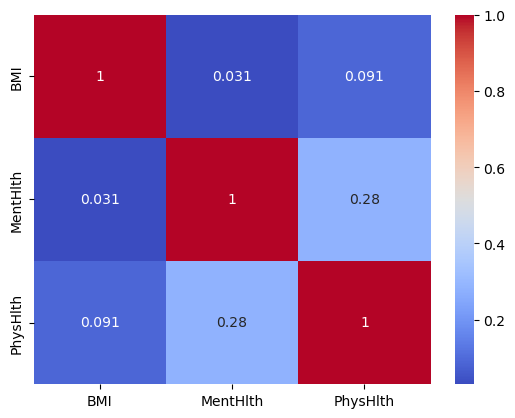

In [14]:
# We use spearman because it handles skewed data well
corr = data[numeric_features].corr(method='spearman')
sns.heatmap(corr, annot=True, cmap='coolwarm')

Our correlation matrix for numeric features shows that there is no strong correlation between any of the numeric features.

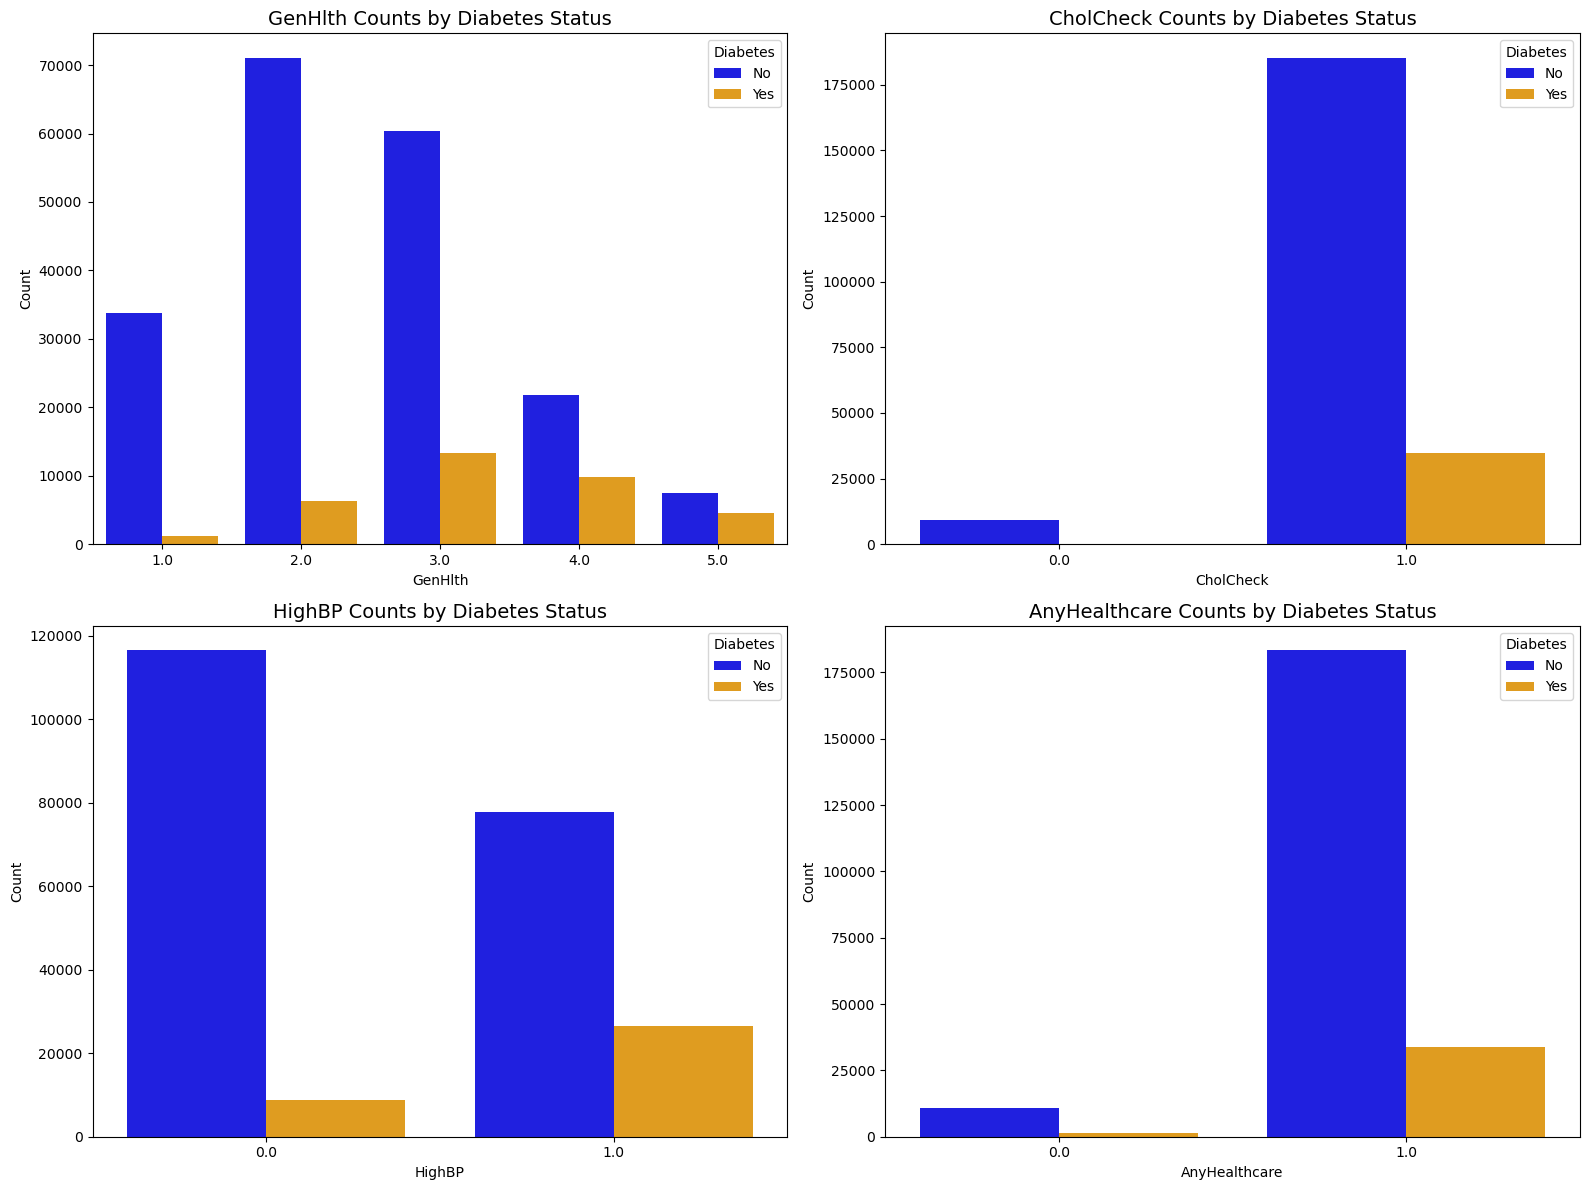

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting  important categorical variables

imp_features = ['GenHlth', 'CholCheck', 'HighBP', 'AnyHealthcare']

plt.figure(figsize=(16,12))

for i, feature in enumerate(imp_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(
        x=feature,
        hue='Diabetes_binary',
        data=data,
        palette={0:'blue', 1:'orange'}
    )
    plt.title(f'{feature} Counts by Diabetes Status', fontsize=14)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Diabetes', labels=['No','Yes'])

plt.tight_layout() 
plt.show()


The poorer ones general health is the higher the likelihood is that htey have diabetes. The ratio for diabetic subjects increases the worse the general health ordinal variable is(higher score is worse).

The subjects with high blood pressure have a higher likelihood of having diabetes.

The subjects who have gotten a cholesterol check in the last 30 days have a higher likelihood of having diabetes.

The subjects who have health care correlates to a higher likelihood of having diabetes. 

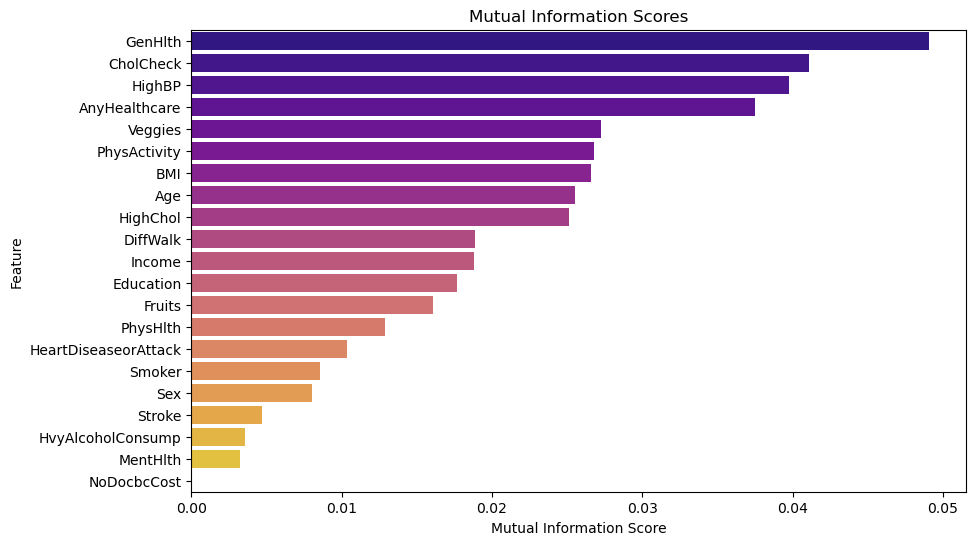

In [16]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']


# Compute mutual information scores
mi_values = mutual_info_classif(X, y, discrete_features='auto', random_state=1)
mi_scores = pd.Series(mi_values, index=X.columns).sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette="plasma")
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()

The features for general health, cholesterol check in the last 30 days, high blood pressure and any healthcare have the highest mutual information scores for our target variable which would most likely make these our most important predictors for diabetes in this dataset. Veggies, PhysActivity BMI, Age and HighChol have moderate predictive power for determining whether the subject is prediabetic or diabetic. The remaining features have low predictive power for our target variable but can still be useful in combination with other features in helping predict diabetes in a subject. No doctor because cost has a mutual information score of 0 indicating weak predictive power on whether or not a subject has diabetes. 

## Feature Engineering

### Filtering

Based on our correlation matrix for numeric features, we do not need to drop any numeric features as none of them have high correlation coefficients with one another.

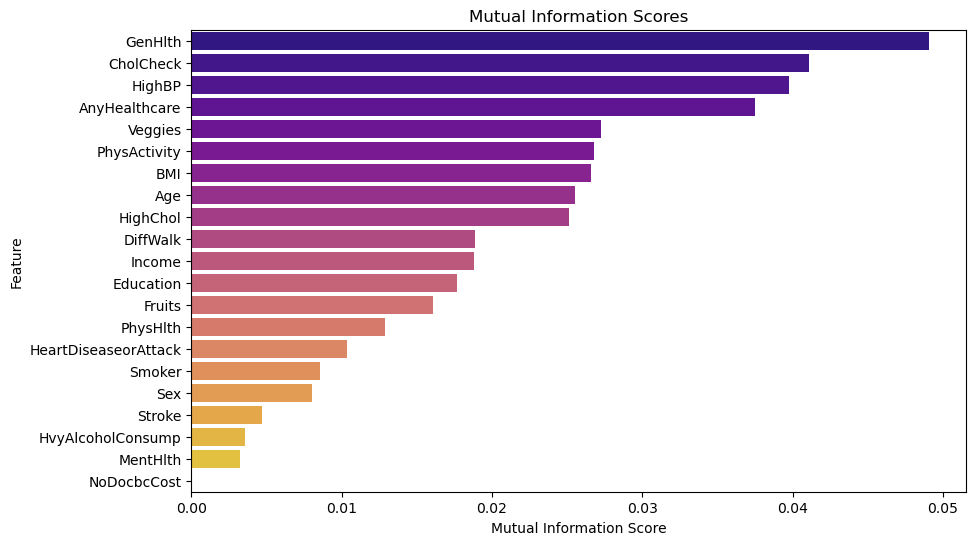

In [17]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = data.drop(columns=['Diabetes_binary'])
y = data['Diabetes_binary']


# Compute mutual information scores
mi_values = mutual_info_classif(X, y, discrete_features='auto', random_state=1)
mi_scores = pd.Series(mi_values, index=X.columns).sort_values(ascending=False)

# Visualize
plt.figure(figsize=(10,6))
sns.barplot(x=mi_scores.values, y=mi_scores.index, palette="plasma")
plt.title("Mutual Information Scores")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.show()

We will drop features with mutual information scores of less than 0.01 as they add additional work for our model but contribute very little to the actual predicitve power of the model. With this we will drop Smoker, Sex, Stroke, HvyAlcoholConsump, MentHlth, NoDocbcCost.

### Embedding

In [18]:
from sklearn.ensemble import RandomForestClassifier
# use features after MI filtering
selected_features = ['GenHlth', 'CholCheck', 'HighBP', 'AnyHealthcare', 'Veggies', 'PhysActivity', 'BMI',
                    'Age', 'HighChol', 'DiffWalk', 'Income', 'Education', 'Fruits', 'PhysHlth', 'HeartDiseaseorAttack']

# X = features, y = target
X = data[selected_features]  
y = data['Diabetes_binary']

# Fit random forest
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X, y)


RandomForestClassifier(random_state=1)

In [19]:
import pandas as pd

# Identify most important features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

top_features = feature_importances.head(12).index.tolist()
print("Selected features by embedding:", top_features)

BMI                     0.234707
Age                     0.152932
Income                  0.124972
PhysHlth                0.113705
Education               0.085000
GenHlth                 0.075352
HighBP                  0.043666
Fruits                  0.032463
Veggies                 0.026734
PhysActivity            0.026704
HighChol                0.026702
DiffWalk                0.024372
HeartDiseaseorAttack    0.018749
AnyHealthcare           0.009660
CholCheck               0.004281
dtype: float64
Selected features by embedding: ['BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'HighBP', 'Fruits', 'Veggies', 'PhysActivity', 'HighChol', 'DiffWalk']


According to the results of our embedding method, we will drop the 3 weakest features being CholCheck, AnyHealthcare and HeartDiseaseorAttack.

### Wrapping

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

X = data[top_features]
y = data['Diabetes_binary']

lr = LogisticRegression(max_iter=1000)

sfs = SequentialFeatureSelector(
    lr, 
    n_features_to_select=10,
    direction='forward',
    scoring='accuracy'
)

sfs.fit(X, y)
final_features = X.columns[sfs.get_support()]
print("Final 10 features after wrapping:", final_features)

Final 10 features after wrapping: Index(['BMI', 'Age', 'Income', 'GenHlth', 'HighBP', 'Fruits', 'Veggies',
       'PhysActivity', 'HighChol', 'DiffWalk'],
      dtype='object')


According to the results of our wrapping method, we will drop 2 additional features in Education and PhysHlth As they were the two weakest features remaining leaving us with 10 features to train our model with cutting out extraneous features or those that did not contribute well to predicting our model.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add constant term for VIF calculation
X = add_constant(data)

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

                 Feature         VIF
0                  const  113.590586
1        Diabetes_binary    1.186086
2                 HighBP    1.320509
3               HighChol    1.166645
4              CholCheck    1.036009
5                    BMI    1.164228
6                 Smoker    1.076263
7                 Stroke    1.078154
8   HeartDiseaseorAttack    1.170505
9           PhysActivity    1.131118
10                Fruits    1.098084
11               Veggies    1.098135
12     HvyAlcoholConsump    1.028120
13         AnyHealthcare    1.109946
14           NoDocbcCost    1.135701
15               GenHlth    1.744394
16              MentHlth    1.221789
17              PhysHlth    1.594911
18              DiffWalk    1.515487
19                   Sex    1.076983
20                   Age    1.361684
21             Education    1.272355
22                Income    1.432108


This information tells me that mutual information informs us of how much information certain features share with the target and it makes it easy for us to filter features that contribute little to the prediction power of our model. 

Embedding ranks features by importance by how well they contribute to the performance of the model by showing how releveant each feature is to the prediction power using the model itself. 

Wrapping using SFS tests combinations of features and see how well features contribute when they interact with one another. This helped us determine the top 10 features that contributed to the model for our dataset.

Our correlation matrix for numeric features shows that there is no strong correlation between any of the numeric features. This is because our strongest correlation coefficient only had a factor of 0.28 which shows no two numeric features give similar information to the model. In addition the Variance Inflation Factor information above indicates that features to dnot have high multi-collinearity as the VIF value for each feature is less than 5.  

I started with 21 features and ended the process with 10 features.

# Training and Testing Process

Since we are trying to predict a categorical outcome of if the subject has diabetes or does not, we are dealing with classification models. Since we are training data with a dataset that has known outcomes we are dealing with supervised learning. This means we select for Classification supervised learning models. For this we will be using logistic regression because it is simple and effective for binary classification, Random Forest because its strong working with imbalanced datasets and performs well for classification, and XGBoost which is strong with large datasets and imbalanced data.

In [22]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split features and target
X = data_scaled[top_features]
y = data['Diabetes_binary']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# Manage imbalanced classes with SMOTE
smote = SMOTE(random_state=1)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("Balanced class distribution:\n", y_train_bal.value_counts())

Original class distribution:
 0.0    155501
1.0     28078
Name: Diabetes_binary, dtype: int64
Balanced class distribution:
 0.0    155501
1.0    155501
Name: Diabetes_binary, dtype: int64


### Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Define stratified k-fold for cross-validation
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# Define parameter grid
param_grid = {
    'C': [0.1, 0.01, 0.001],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize logistic regression model
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')

# Weighted F1 for scoring
f1_scorer = make_scorer(f1_score, average='weighted')

# Grid search with 10-fold stratified cross-validation
grid_search = GridSearchCV(lr_model, param_grid, scoring=f1_scorer, cv=skf)
grid_search.fit(X_train_bal, y_train_bal)

# Best parameters
print("Best parameters:", grid_search.best_params_)

C:\Users\rajiv\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\rajiv\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
C:\Users\rajiv\anaconda3\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\rajiv\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: Us

Best parameters: {'C': 0.1, 'solver': 'liblinear'}


In [24]:
# Final model with best parameters
final_lr = LogisticRegression(
    C=grid_search.best_params_['C'], 
    solver=grid_search.best_params_['solver'], 
    max_iter=1000,
    class_weight='balanced'
)
final_lr.fit(X_train_bal, y_train_bal)

# Predict on the test set
y_predict = final_lr.predict(X_test)
y_proba = final_lr.predict_proba(X_test)[:, 1]  # Probabilities for AUC

# Metrics
cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")

Confusion Matrix:
 [[27717 11159]
 [ 1775  5244]]
Accuracy: 0.7182
Precision: 0.3197
Recall: 0.7471
F1-Score: 0.4478
AUC Score: 0.8043


### Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Initialize model
rf_model = RandomForestClassifier(random_state=1)

# Weighted F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Grid search with 10-fold CV
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, scoring=f1_scorer, cv=skf, n_jobs=-1)
grid_search_rf.fit(X_train_bal, y_train_bal)

print("Best RF parameters:", grid_search_rf.best_params_)

Best RF parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [26]:
# Train final model with best parameters
final_rf = RandomForestClassifier(
    n_estimators=grid_search_rf.best_params_['n_estimators'],
    max_depth=grid_search_rf.best_params_['max_depth'],
    min_samples_split=grid_search_rf.best_params_['min_samples_split'],
    min_samples_leaf=grid_search_rf.best_params_['min_samples_leaf'],
    class_weight='balanced',
    random_state=1
)
final_rf.fit(X_train_bal, y_train_bal)

# Predict on test set
y_predict_rf = final_rf.predict(X_test)
y_proba_rf = final_rf.predict_proba(X_test)[:, 1]

# Metrics
cm_rf = confusion_matrix(y_test, y_predict_rf)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
precision_rf = precision_score(y_test, y_predict_rf)
recall_rf = recall_score(y_test, y_predict_rf)
f1_rf = f1_score(y_test, y_predict_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print("Confusion Matrix:\n", cm_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(f"AUC Score: {auc_rf:.4f}")

Confusion Matrix:
 [[35858  3018]
 [ 4947  2072]]
Accuracy: 0.8265
Precision: 0.4071
Recall: 0.2952
F1-Score: 0.3422
AUC Score: 0.7690


### XGBoost

In [27]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score

# Stratified 5-fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Weighted F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Initialize XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=1,
    n_jobs=-1
)

# Define parameter grid (reasonable starting point)
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2]  # helpful if imbalance remains
}

# Grid search with 10-fold CV
grid_search_xgb = GridSearchCV(
    xgb_model,
    param_grid_xgb,
    scoring=f1_scorer,
    cv=skf,
    n_jobs=-1
)

# Fit Grid Search (use SMOTE-balanced data)
grid_search_xgb.fit(X_train_bal, y_train_bal)

print("Best XGBoost parameters:", grid_search_xgb.best_params_)
print(f"Best cross-validated weighted F1 score: {grid_search_xgb.best_score_:.4f}")

C:\Users\rajiv\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [04:11:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGBoost parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}
Best cross-validated weighted F1 score: 0.8979


In [28]:
# Final model
best_xgb = grid_search_xgb.best_estimator_

# Evaluate on test data
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

cm = confusion_matrix(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1_xg = f1_score(y_test, y_pred_xgb)
auc_xg = roc_auc_score(y_test, y_proba_xgb)

print("\nConfusion Matrix:\n", cm)
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1_xg:.4f}")
print(f"AUC: {auc_xg:.4f}")


Confusion Matrix:
 [[37038  1838]
 [ 5226  1793]]
Accuracy: 0.8461
Precision: 0.4938
Recall: 0.2554
F1-Score: 0.3367
AUC: 0.8034


### Feature Meanings
Logistic Regression:
- C: The parameter C represent the inverse of the regularization strength. This means that a samller C value means stronger regularization which weakenes the influence of less important features while a larger C value means weaker regularization which increases the influence of features. My value of 0.1 means the model has strong regularization with no single feature having too much influence. This is sound because many of the features contribute a substantial amount of information for predicting the target.

- Solver: The algorithm used to determien the best fit line. Liblinear was my solver. Which is strong for small to medium sized data sets.

Random Forest:
- n estimators: Tells how many decision trees to build in the forest. 200 means that a substantial amount of trees are created to get more accurate results. 

- max_depth: How deep each decision tree can go. A depth of none means all leaves contains only one class. 

XGBoost:
- learning_rate: How much a new tree contributes to improving the model. A value of 0.1 means relatively balanced learning.

- max_depth: The depth of each tree in the boost. A depth of 7 finds a balance between too much bias or variance.

- subsample: Amount of training data that each tree uses. A value of 1 means it uses all the training data. 

- colsample_bytree: The amount of features each tree uses. Each tree in my model uses 0.8 of the features. 

My model makes predictions exhibited by the results of each of my training above.

## Hyper Parameter Tuning Technique

I use Grid Search with stratified K-fold for hyper paramter tuning. Grid search tests all combinations of the hyperparameters that I determine and finds the best combination based on a weighted F1 score. By using K-fold CV I ensure that the hyperparameter training isn't biased by a single split that might overfit the data. The best parameters for each model is determined and printed at the end of each GridSearch code block

## Performance Metrics

In [29]:
import pandas as pd

# Define the metrics for each model
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy, accuracy_rf, acc],
    'Precision': [precision, precision_rf, prec],
    'Recall': [recall, recall_rf, rec],
    'F1-Score': [f1, f1_rf, f1_xg],
    'AUC': [auc, auc_rf, auc_xg]
}

# Create DataFrame
metrics_df = pd.DataFrame(metrics_data)

# Print nicely
display(metrics_df.head())

,Model,Accuracy,Precision,Recall,F1-Score,AUC
0,Logistic Regression,0.718183,0.319698,0.747115,0.447784,0.804301
1,Random Forest,0.826452,0.407073,0.295199,0.342225,0.769023
2,XGBoost,0.846083,0.493803,0.255449,0.336714,0.803405


The metrics I used to compare my models in terms of performance are accuracy, precision, recall, f1-score and AUC.

- Logistic Regression:
 - Lowest accuracy but highest recall which means that its good at determining positive cases for diabetic or prediabetic individuals.
 
 - Precision is low which means that the model happens to have a large amount of false positives as well.
 
 - Highest f1 score

- Random Forest:
 - It is more accurate than LR but it misses many positives so it fails to determine a lot of the diabetic or prediabetic individuals. 
 - Precision is up around 0.09 for Random Forest. 
 - F1- score is slightly lower than LR most likely due to the poor recall value.

- XGBoost: 
 - Highest accuracy model with highest precision too but with the poorest recall value.
 - F1 score is lower than LR but slightly higher than RF.

My tree models like RF and XGBoost could fall under risk for overfitting with high max_depth values or a large amount of n_estimators. 

To avoid this I used cross validation via Stratified KFold to make sure that models each fold took a different slice of data to avoid overfitting on any one split. In addition, using GridSearch for hyper parameter tuning ensured that we picked the best paramters for our model which helpd avoid overfitting or underfitting. Class balancing via SMOTE also helps to make sure that there is mitigated bias if any toward the majority class especially in an unblanaced dataset such as this. 

For logistic regression, controlling the parameter C helped us managae regularization as C describes regularization strength of the model. Stronger regularization prevents overfitting. The min/max samples for the RF tree and the max depth help to apply regularization. Similarly, the parameters for XGBoost apply regularizatoin by letting you determine how much influence each feature has in contributing to the trees in the model which is a form of regularization.

In [30]:
# Fit final model once on the full training set
final_lr = LogisticRegression(
    C=0.1,
    solver='liblinear',
    max_iter=1000,
    class_weight='balanced'
)
final_lr.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred = final_lr.predict(X_test)
y_proba = final_lr.predict_proba(X_test)[:,1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("AUC:", auc)

Accuracy: 0.7181828085848132
Precision: 0.3196976162897031
Recall: 0.7471149736429691
F1: 0.44778413457433186
AUC: 0.8043011196909844


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize RF model manually (default or chosen parameters)
rf_default = RandomForestClassifier(
    n_estimators=200,     
    max_depth=None,      
    min_samples_split=5,  
    min_samples_leaf=1,   
    class_weight='balanced', 
    random_state=1
)

# Fit on balanced training set
rf_default.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_rf = rf_default.predict(X_test)
y_proba_rf = rf_default.predict_proba(X_test)[:, 1]

# Compute metrics
metrics_rf_default = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_proba_rf)
}

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display results
print("Random Forest metrics (without CV):")
for k, v in metrics_rf_default.items():
    print(f"{k}: {v:.4f}")

Random Forest metrics (without CV):
Accuracy: 0.8265
Precision: 0.4071
Recall: 0.2952
F1-Score: 0.3422
AUC: 0.7690


Best XGBoost parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'scale_pos_weight': 1, 'subsample': 1.0}

In [32]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Initialize XGBoost with default or manually chosen parameters
xgb_default = XGBClassifier(
    n_estimators=200,       
    max_depth=7,            
    learning_rate=0.1,     
    subsample=1.0,         
    colsample_bytree=0.8,  
    scale_pos_weight=1,     
    random_state=1,
    n_jobs=-1
)

# Fit on SMOTE-balanced training set
xgb_default.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_xgb = xgb_default.predict(X_test)
y_proba_xgb = xgb_default.predict_proba(X_test)[:, 1]  # for AUC

# Compute metrics
metrics_xgb_default = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'AUC': roc_auc_score(y_test, y_proba_xgb)
}

# Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display results
print("XGBoost metrics (without CV):")
for k, v in metrics_xgb_default.items():
    print(f"{k}: {v:.4f}")


XGBoost metrics (without CV):
Accuracy: 0.8461
Precision: 0.4938
Recall: 0.2554
F1-Score: 0.3367
AUC: 0.8034


My results with cross validation and without cross validation are the same for each model. This is because the method I used for hyper paramter training was GridSearchCV so the hyperparamters stay the same between each run and I alos use random state 1 for stratified k fold which means my splits reproduce the same results on each run. For with cross validation I just took the results from my original test which used stratified K-fold and for without cross-validation I used the SMOTE balanced dataset and predicited on the training set on the entire test set with no folds. 

Without Hyperparamter:

In [33]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, f1_score

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Weighted F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Initialize Logistic Regression with default params
lr_default = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=1)

# CV evaluates the model's performance
cv_scores = cross_val_score(lr_default, X_train_bal, y_train_bal, cv=skf, scoring=f1_scorer)

# Fit on full training set
lr_default.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred = lr_default.predict(X_test)
y_proba = lr_default.predict_proba(X_test)[:, 1]

# Compute metrics
metrics_default = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_proba)
}

print("LR metrics (without Hyperparameter):")
for k, v in metrics_xgb_default.items():
    print(f"{k}: {v:.4f}")

LR metrics (without Hyperparameter):
Accuracy: 0.8461
Precision: 0.4938
Recall: 0.2554
F1-Score: 0.3367
AUC: 0.8034


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

# Stratified 5-fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Weighted F1 scorer
f1_scorer = make_scorer(f1_score, average='weighted')

# Random Forest with default parameters
rf_default = RandomForestClassifier(
    class_weight='balanced', 
    random_state=1
)

# CV scores to evaluate model
cv_scores = cross_val_score(rf_default, X_train_bal, y_train_bal, cv=skf, scoring=f1_scorer)


rf_default.fit(X_train_bal, y_train_bal)

# Predict on test set
y_pred_rf = rf_default.predict(X_test)
y_proba_rf = rf_default.predict_proba(X_test)[:, 1]

# Compute metrics
metrics_rf_default = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-Score': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_proba_rf)
}


# Display results
print("\nRandom Forest metrics (without Hyperparameter):")
for k, v in metrics_rf_default.items():
    print(f"{k}: {v:.4f}")


Random Forest metrics (without Hyperparameter):
Accuracy: 0.8201
Precision: 0.3833
Recall: 0.2895
F1-Score: 0.3298
AUC: 0.7547


In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
import numpy as np

xgb_default = XGBClassifier(random_state=1)

# Stratified 5-fold CV to preserve class proportions
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Use weighted F1 for consistency with other models
f1_scorer = make_scorer(f1_score, average='weighted')

# Perform cross-validation
cv_scores = cross_val_score(
    xgb_default,
    X_train_bal,
    y_train_bal,
    scoring=f1_scorer,
    cv=skf,
    n_jobs=-1
)

xgb_default.fit(X_train_bal, y_train_bal)
y_pred_xgb = xgb_default.predict(X_test)
y_proba_xgb = xgb_default.predict_proba(X_test)[:, 1]


metrics_xgb_default = {
    'Accuracy': accuracy_score(y_test, y_pred_xgb),
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1-Score': f1_score(y_test, y_pred_xgb),
    'AUC': roc_auc_score(y_test, y_proba_xgb)
}


print("XGBoost metrics (no Hyperparameter):")
for k, v in metrics_xgb_default.items():
    print(f"{k}: {v:.4f}")


XGBoost metrics (no Hyperparameter):
Accuracy: 0.8472
Precision: 0.5008
Recall: 0.2337
F1-Score: 0.3186
AUC: 0.8018


Without hyperparameter tuning, we simply use the default parameters for training. What this results in is that the statistics for model evaluation are more similar to our outcomes when we do use hyperparamter training when the hyperparamter determined values are most similar to the default values.

For Logistic regression, the model without hyperparamter training has a higher accuracy and precision with around .1 better accuracy and a .18 better precision than that of the model trained using hyperparameter tuning. That being said the no hyperparameter model has a 0.5 worse recall value and has a worse f1 score by a factor of nearly 0.11.

For Random Forest, the model with hyper parameter tuning performed slightly better across every metric. The margin might be slight because the default values for training might have been close to the hyperparameter tuned parameter values for our original model.

For XGBoost, our hyperparameter tuned model performed better across all metrics except precision only losing by a small margin of 0.01. The F1-Score determines that the hyperparameter tuned XGBoost model performed better by a score of 0.02. The margins for this model might also be small for similar reasons as why the margin difference for random forest was small.

# Analysis

I learned that the performance of a model can depend heavily on which metric is deemed to be most important for the outcome of the model. Our goal is to effectively predict diabetes in subjects based on sociodemographic features and health history with the exception of BMI. Logistic Regression performed best in this metric by having the highest recall yet XG Boost had the highest accuracy  and precision. According strictly to the goal of this experiemnt Logistic Regression performed best though XGBoost had the best metrics. I also learned that relying too heavily on SMOTE to account for 35% of data when having an imbalanced target can be a big reason why performance metrics are not as accurate as we would have liked. 

A pattern I observed with my data is that tree-based models generally performed better in metrics like accuracy and precision but were not as strong at capturing minority positive cases. Another pattern I observed is that when doing feature engineering I found that certain metrics consistently contributed largely to the model's performance. In particular BMI, Age and Income all consistently contributed significantly to model performance. 

## Conclusion


As our current model stands, the best performing model for the purpose of this experiment is Logistic Regresssion for the goal of ensuring that diabetes prediction from our model is consistent and accurate. The goal of future iterations of a similar diabetes prediction model should be a refined feature selection such that feature contributions are detected more definitively. This is because different feature engineering methods would yield polar opposite results for some features as to which were most significant in contributing to model performance. In addition an ideal model would seak to combine the strengths of LR and XGBoost in having high accuracy and precision while also having high recall. This is achieved by more robust parameter selection by increasing the number of parameter combinations experimented with in our grid for GridSearchCV as well as using a more balanced data set so SMOTE is not relied to generate a significant amount of data. This way the model can rely more on real data instead of generated values that account for nearly 35% of our balanced dataset composition.  